In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/kc_house_data.csv")


In [2]:
data.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your DataFrame is named 'df'
feature_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
                    'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                    'sqft_living15', 'sqft_lot15']

# Extract features (X) and target variable (y)
X = data[feature_columns]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardize the features (optional but often recommended for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 201366.95714095188
R2: 0.7128704839109334
Mean Absolute Error (MAE): 124966.55998317586


In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget  https://downloads.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
!tar xf spark-3.3.3-bin-hadoop3.tgz
!pip install -q findspark


--2023-12-09 15:00:56--  https://downloads.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299426263 (286M) [application/x-gzip]
Saving to: ‘spark-3.3.3-bin-hadoop3.tgz’

spark-3.3.3-bin-had 100%[===================>] 285.55M  89.5MB/s    in 3.4s    

2023-12-09 15:01:00 (84.2 MB/s) - ‘spark-3.3.3-bin-hadoop3.tgz’ saved [299426263/299426263]



In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.3-bin-hadoop3"


In [6]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").config("spark.driver.memory", "8g").getOrCreate()


In [7]:
# spark.stop()

In [8]:
df = spark.read.csv("/content/kc_house_data.csv", header=True, inferSchema=True)


In [9]:
df.count()

21613

In [10]:
df.show(5)


+----------+---------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|           date|   price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+---------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|20141013T000000|221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192|20141209T000000|538000.0|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|   

In [11]:
df = df.drop('date')
df.show()

+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520| 221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192| 538000.0|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|    1951|        1991|  98125| 47.721|-122.319|         1690|      7639|
|5631

In [12]:
from pyspark.sql.functions import col, max as max_, min as min_

# Define a list of column names to be normalized
cols_to_normalize = df.columns

# Convert the DataFrame to double type
df = df.select([col(c).cast("double") for c in cols_to_normalize])

# Compute the min and max for each column
mins = df.select([min_(c).alias(c) for c in cols_to_normalize])
maxs = df.select([max_(c).alias(c) for c in cols_to_normalize])

# Create a dictionary of min and max values for each column
min_values = mins.first().asDict()
max_values = maxs.first().asDict()

# Define a function to normalize a column
def normalize(c):
    min_val = min_values.get(c)
    max_val = max_values.get(c)
    if min_val is not None and max_val is not None:
        return (col(c) - min_val) / (max_val - min_val)
    else:
        return col(c)  # Return the original column if it cannot be normalized

# Apply the normalization to each column
df_normalized = df.select([normalize(c).alias(c) for c in cols_to_normalize])


In [13]:
df_normalized.show()

+--------------------+--------------------+-------------------+---------+--------------------+--------------------+------+----------+----+---------+------------------+-------------------+-------------------+-------------------+------------------+--------------------+-------------------+-------------------+-------------------+--------------------+
|                  id|               price|           bedrooms|bathrooms|         sqft_living|            sqft_lot|floors|waterfront|view|condition|             grade|         sqft_above|      sqft_basement|           yr_built|      yr_renovated|             zipcode|                lat|               long|      sqft_living15|          sqft_lot15|
+--------------------+--------------------+-------------------+---------+--------------------+--------------------+------+----------+----+---------+------------------+-------------------+-------------------+-------------------+------------------+--------------------+-------------------+---------------

In [14]:
rdd = df_normalized.rdd
rdd = rdd.repartition(100)


In [15]:
import random

class KWTAModel:

    def __init__(self, N, K, r):
        self.N = N
        self.K = K
        self.r = r
        self.x = [0.0] * N
        self.gamma = 0.05  # max disturbance

    def disturbed_spike_train(self, t):
        if t % 5 == 0:
            return 1 + random.normalvariate(0, self.gamma)
        else:
            return 0

    def drifted_difference_function(self, test_data):
        disturbances = [random.normalvariate(0, self.gamma) for _ in range(self.N)]
        return sum(self.disturbed_step_function(test_data)) - self.K + sum(disturbances)

    def disturbed_step_function(self, test_data):
        return [float(test_data[i] - self.x[i] + random.normalvariate(0, self.gamma) > 0) for i in range(self.N)]

    def state_equation(self, t, test_data):
        disturbed_spike = self.disturbed_spike_train(t)
        drift_diff_func = self.drifted_difference_function(test_data)
        self.x = [self.x[i] + self.r * drift_diff_func * disturbed_spike for i in range(self.N)]

    def output_equation(self, test_data):
        return [test_data[i] - self.x[i] for i in range(self.N)]

    def simulate(self, num_steps, delta_t, test_data):
        outputs = []
        for step in range(num_steps):
            t = step * delta_t
            self.state_equation(t, test_data)
            output = self.output_equation(test_data)
            outputs.append(output)
        return outputs


In [16]:
# Initialize the model
N = len(df_normalized.columns)  # number of inputs
K = 5  # number of winners
r = 0.1  # resolution parameter
model = KWTAModel(N, K, r)

# Run the simulation for each data point
num_steps = 1000
delta_t = 0.01
# outputs = rdd.map(lambda row: model.simulate(num_steps, delta_t, list(row))).collect()


In [17]:
# Run the simulation for each data point
num_steps = 1000
delta_t = 0.01
outputs = rdd.map(lambda row: model.simulate(num_steps, delta_t, list(row)))

# Take the first 10 elements
first_10_outputs = outputs.take(10)


In [18]:
first_10_outputs

[[[-0.3381968380743695,
   -1.1080805354095604,
   -1.022278250263013,
   -1.018490371475134,
   -1.0483960318524925,
   -1.139189528085803,
   -0.9434903714751341,
   -1.143490371475134,
   -1.143490371475134,
   -0.6434903714751341,
   -0.6434903714751341,
   -1.005332476738292,
   -1.143490371475134,
   -0.6478381975620906,
   -1.143490371475134,
   -0.6131873411721038,
   -0.54384423990042,
   -1.0031249229701424,
   -0.962626492624678,
   -1.135485078263609],
  [-0.3381968380743695,
   -1.1080805354095604,
   -1.022278250263013,
   -1.018490371475134,
   -1.0483960318524925,
   -1.139189528085803,
   -0.9434903714751341,
   -1.143490371475134,
   -1.143490371475134,
   -0.6434903714751341,
   -0.6434903714751341,
   -1.005332476738292,
   -1.143490371475134,
   -0.6478381975620906,
   -1.143490371475134,
   -0.6131873411721038,
   -0.54384423990042,
   -1.0031249229701424,
   -0.962626492624678,
   -1.135485078263609],
  [-0.3381968380743695,
   -1.1080805354095604,
   -1.02227825

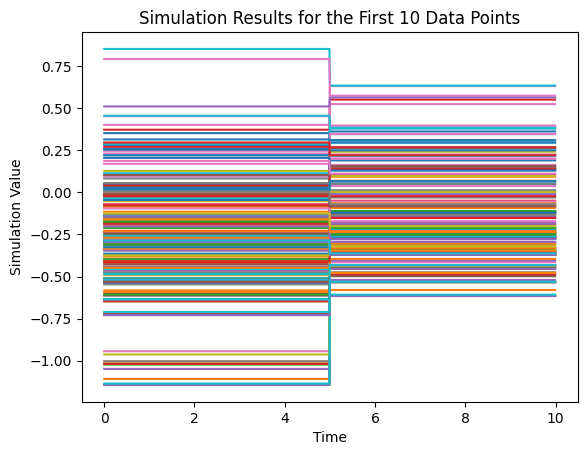

In [19]:
import matplotlib.pyplot as plt
import numpy as np

for simulation_result in first_10_outputs:
    time_points = np.arange(0, num_steps * delta_t, delta_t)
    plt.plot(time_points, simulation_result, label="Simulation Result")

plt.xlabel("Time")
plt.ylabel("Simulation Value")
plt.title("Simulation Results for the First 10 Data Points")
plt.show()


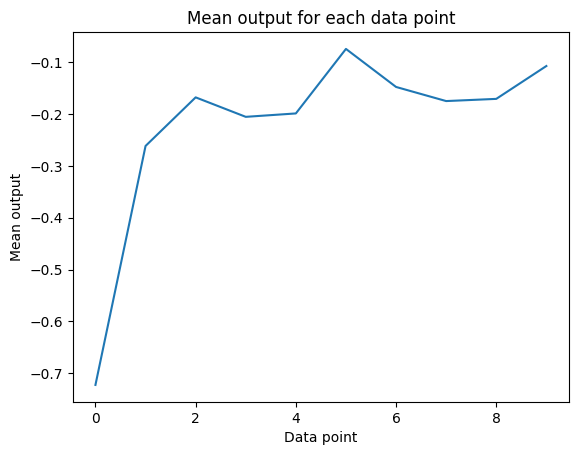

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the mean output for each data point
outputs_mean = outputs.map(np.mean)

# Take a subset of the results for plotting
subset_outputs_mean = outputs_mean.take(10)

# Plot the mean outputs on the driver node
plt.plot(subset_outputs_mean)
plt.xlabel('Data point')
plt.ylabel('Mean output')
plt.title('Mean output for each data point')
plt.show()

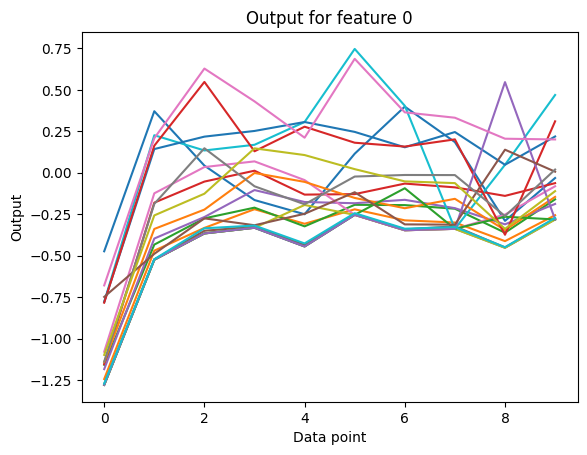

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a feature to plot
feature = 0

# Compute the output for the chosen feature
outputs_feature = outputs.map(lambda output: output[feature])

# Take a subset of the results for plotting
subset_outputs_feature = outputs_feature.take(10)

# Plot the outputs for the chosen feature on the driver node
plt.plot(subset_outputs_feature)
plt.xlabel('Data point')
plt.ylabel('Output')
plt.title('Output for feature ' + str(feature))
plt.show()


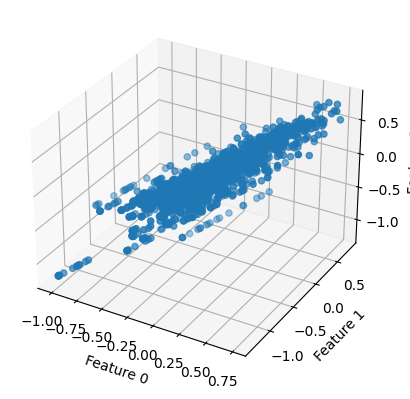

In [22]:
from mpl_toolkits.mplot3d import Axes3D

# Choose three features to plot
x_feature = 0
y_feature = 1
z_feature = 2

# Compute the output for each feature
outputs_x = outputs.map(lambda output: output[x_feature]).take(100)
outputs_y = outputs.map(lambda output: output[y_feature]).take(100)
outputs_z = outputs.map(lambda output: output[z_feature]).take(100)

# Create a new figure
fig = plt.figure()

# Create a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(outputs_x, outputs_y, outputs_z)

# Set the labels
ax.set_xlabel('Feature ' + str(x_feature))
ax.set_ylabel('Feature ' + str(y_feature))
ax.set_zlabel('Feature ' + str(z_feature))

# Show the plot
plt.show()


In [23]:
import random
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, max as max_, min as min_

if __name__ == "__main__":
    # Initialize the model
    N = len(df_normalized.columns)  # number of inputs
    K = 5  # number of winners
    r = 0.1  # resolution parameter
    model = KWTAModel(N, K, r)

    # Run the simulation for each data point
    simulations = rdd.map(lambda row: model.simulate(num_steps, delta_t, list(row)))

    # Extract outputs and predictions separately
    outputs = simulations.map(lambda sim: sim[0])
    predictions = simulations.map(lambda sim: sim[1])

    # Take the first 10 elements of predictions
    first_10_predictions = predictions.take(10)

    # Print or visualize the predictions
    print(first_10_predictions)


[[-0.2486537917848476, -1.0185374891200385, -0.932735203973491, -0.9289473251856122, -0.9588529855629707, -1.0496464817962812, -0.8539473251856122, -1.0539473251856122, -1.0539473251856122, -0.5539473251856122, -0.5539473251856122, -0.91578943044877, -1.0539473251856122, -0.5582951512725687, -1.0539473251856122, -0.5236442948825819, -0.45430119361089805, -0.9135818766806204, -0.8730834463351561, -1.045942031974087], [0.34161723701339286, -0.4986246705901595, -0.4621418091892653, -0.20930090009835622, -0.4255037302870355, -0.5514710973435146, -0.1530509000983562, -0.5530509000983562, -0.5530509000983562, 0.19694909990164378, 0.1136157665683104, -0.3677438825544966, -0.5530509000983562, 0.13390562164077424, -0.5530509000983562, -0.5176973647448209, 0.17881334310576225, -0.2166721625568292, -0.2861433110431162, -0.5505180156771462], [-0.028772354315699022, -0.4040781460562764, -0.3466116780980052, -0.12502076900709608, -0.3386528444787942, -0.4214943727322322, -0.037520769007096055, -0.43

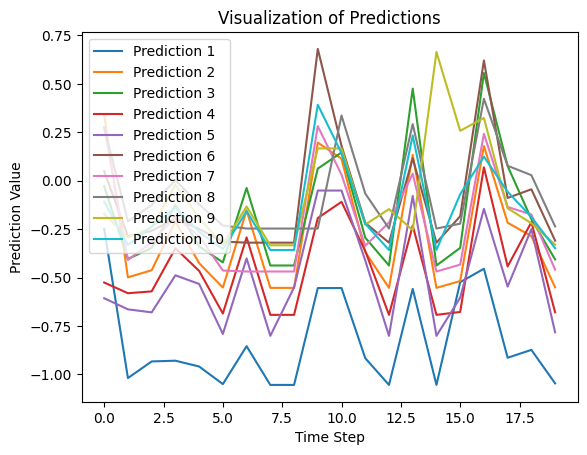

In [24]:
prediction_values = np.array(first_10_predictions)

for i in range(prediction_values.shape[0]):
    plt.plot(prediction_values[i, :], label=f'Prediction {i + 1}')

plt.xlabel('Time Step')
plt.ylabel('Prediction Value')
plt.legend()
plt.title('Visualization of Predictions')
plt.show()

In [25]:
df.columns

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [26]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Spark session
spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()


# Assemble features into a single vector column
feature_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
                    'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                    'sqft_living15', 'sqft_lot15']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="price")

# Pipeline with assembler and regression model
pipeline = Pipeline(stages=[assembler, lr])

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=123)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# You can also print other metrics like R2, MAE, etc.
r2 = evaluator.setMetricName("r2").evaluate(predictions)
mae = evaluator.setMetricName("mae").evaluate(predictions)

print(f"R2: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Stop the Spark session
spark.stop()


Root Mean Squared Error (RMSE): 189842.24282799874
R2: 0.6989043537570954
Mean Absolute Error (MAE): 124660.4423791477
